<a href="https://colab.research.google.com/github/NickMattiss/AIML_inlamning1/blob/main/AIML_inlamning1_NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import sys
!{sys.executable} -m pip install numpy tensorflow
from IPython.display import clear_output
clear_output()
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Install and import wandb library
!pip install wandb
import wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.2 MB/s 
     |████████████████████████████████| 168 kB 51.7 MB/s 
     |████████████████████████████████| 182 kB 48.8 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 168 kB 46.7 MB/s 
     |████████████████████████████████| 166 kB 10.9 MB/s 
     |████████████████████████████████| 166 kB 58.8 MB/s 
     |████████████████████████████████| 162 kB 46.5 MB/s 
     |████████████████████████████████| 162 kB 50.6 MB/s 
     |████████████████████████████████| 158 kB 50.3 MB/s 
     |████████████████████████████████| 157 kB 50.7 MB/s 
     |████████████████████████████████| 157 kB 40.6 MB/s 
     |████████████████████████████████| 157 kB 52.9 MB/s 
     |████████████████████████████████| 157 kB 47.1 MB/s 
     |████████████████████████████████| 157 kB 52.8 MB/s 
     |████████████████████████████

In [3]:
# Import the data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Prepare the data
x_train = x_train.astype("float32") / 255 # from integers to floats
x_test = x_test.astype("float32") / 255
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) # shape to 28*28
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_train = keras.utils.to_categorical(y_train, 10) # convert class vectors to binary, define no of classes
y_test = keras.utils.to_categorical(y_test, 10)

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [5]:
# Define the cnn model
def create_cnn(input_shape, output_classes):
    return keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(output_classes, activation="softmax"),
        ]
    )

In [6]:
# Compile the model
model = create_cnn((28, 28, 1), 10) # image shape, no of classes
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
# Train the model
wandb.init(project="aiml_inlamning1_wandb") # wandb.login()
# wandb.log({"myparam": 100}, step=5)
batch_size = 128
epochs = 5
model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, validation_split=0.1, 
          callbacks=[wandb.keras.WandbCallback()])
wandb.finish()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/5
422/422 [==============================] - ETA: 0s - loss: 0.6299 - accuracy: 0.7740

wandb: Adding directory to artifact (/content/wandb/run-20221211_110344-2ai53y1o/files/model-best)... Done. 0.0s


422/422 [==============================] - 51s 118ms/step - loss: 0.6299 - accuracy: 0.7740 - val_loss: 0.4698 - val_accuracy: 0.8278
Epoch 2/5
422/422 [==============================] - ETA: 0s - loss: 0.4014 - accuracy: 0.8579

wandb: Adding directory to artifact (/content/wandb/run-20221211_110344-2ai53y1o/files/model-best)... Done. 0.0s


422/422 [==============================] - 48s 114ms/step - loss: 0.4014 - accuracy: 0.8579 - val_loss: 0.3715 - val_accuracy: 0.8675
Epoch 3/5
422/422 [==============================] - 47s 112ms/step - loss: 0.3586 - accuracy: 0.8726 - val_loss: 0.3783 - val_accuracy: 0.8653
Epoch 4/5
422/422 [==============================] - ETA: 0s - loss: 0.3295 - accuracy: 0.8822

wandb: Adding directory to artifact (/content/wandb/run-20221211_110344-2ai53y1o/files/model-best)... Done. 0.0s


422/422 [==============================] - 50s 119ms/step - loss: 0.3295 - accuracy: 0.8822 - val_loss: 0.3307 - val_accuracy: 0.8820
Epoch 5/5
422/422 [==============================] - ETA: 0s - loss: 0.3103 - accuracy: 0.8893

wandb: Adding directory to artifact (/content/wandb/run-20221211_110344-2ai53y1o/files/model-best)... Done. 0.0s


422/422 [==============================] - 56s 133ms/step - loss: 0.3103 - accuracy: 0.8893 - val_loss: 0.3148 - val_accuracy: 0.8842


accuracy,▁▆▇██
epoch,▁▃▅▆█
loss,█▃▂▁▁
val_accuracy,▁▆▆██
val_loss,█▄▄▂▁
accuracy,0.88933
best_epoch,4
best_val_loss,0.3148
epoch,4
loss,0.31028
val_accuracy,0.88417


In [ ]:
# PREPROCESS WITH WANDB

In [8]:
# Import packages
# import sys
# !{sys.executable} -m pip install numpy tensorflow wandb
# import wandb
# import numpy as np
# from tensorflow import keras
import matplotlib.pyplot as plt

In [13]:
from datetime import datetime
date_and_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

wandb_run = wandb.init(project="aiml_inlamning1_wandb", name=f"preprocessing {date_and_time}")

wandb: Currently logged in as: nickmattiss. Use `wandb login --relogin` to force relogin


In [11]:
# Download the data

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [9]:
# Define histograms

def log_bar(x, y, title, x_name="x", y_name="y", keep_order=False):
    if keep_order:
        x = [f"{idx}: {x_}" for idx, x_ in enumerate(x)] # Make sure alphabetical sorting works
    table = wandb.Table(
        data=[[x, y] for x, y in zip(x, y)],
        columns=[x_name, y_name]
    )
    wandb.log({title: wandb.plot.bar(table, x_name, y_name, title=title)})


def create_histogram(data, min_value=None, max_value=None, bins=10):
    if min_value is None:
        min_value = data.min()
    if max_value is None:
        max_value = data.max()

    if isinstance(bins, int):
        bin_edges = np.linspace(min_value, max_value, num=bins)
    else:
        bin_edges = bins
        
    numbers, _ = np.histogram(data, bins=bin_edges)
    bin_names = [f"{lower:.1f}-{upper:.1f}" for lower, upper in zip(bin_edges[:-1], bin_edges[1:])]

    return bin_names, numbers

In [14]:
# Visualize labels

from collections import Counter

num_images_per_label = Counter(y_train)
x, num_images = zip(*((str(x_), num_) for x_, num_ in sorted(num_images_per_label.items())))
log_bar(x, num_images, "Labels in training data", x_name="Label", y_name="# images")

num_images_per_label = Counter(y_test)
x, num_images = zip(*((str(x_), num_) for x_, num_ in sorted(num_images_per_label.items())))
log_bar(x, num_images, "Labels in test data", x_name="Label", y_name="# images")

In [15]:
print(num_images_per_label)

Counter({9: 1000, 2: 1000, 1: 1000, 6: 1000, 4: 1000, 5: 1000, 7: 1000, 3: 1000, 8: 1000, 0: 1000})


Sample 22 is a coat


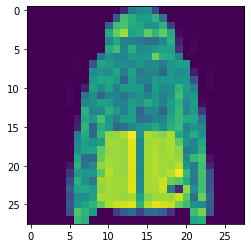

In [27]:
# Visualize training data
dict = {0:'t-shirt', 1:'trouser', 2:'pullover', 3:'dress', 4:'coat', 5:'sandal', 6:'shirt', 7:'sneaker', 8:'bag', 9:'ankle boot'}
i = 22
print(f"Sample {i} is a {dict[y_train[i]]}")
plt.imshow(x_train[i])

image = wandb.Image(x_train[i], caption=f"Training sample {i} is a {y_train[i]}")
wandb.log({"Example training image": image})

In [ ]:
# Log the datasets minimum and maximum intensities and datatype to the WandB summary
min_value = min(x_train.min(), x_test.min())
max_value = max(x_train.max(), x_test.max())
wandb_run.summary["raw"] = {"min": min_value, "max": max_value, "dtype": str(x_train.dtype)}

# Create a new histogram of the image pixels intensities
bin_names, train_hist = create_histogram(x_train)
log_bar(bin_names, train_hist, "Raw training data", x_name="bin", y_name="# pixels", keep_order=True)

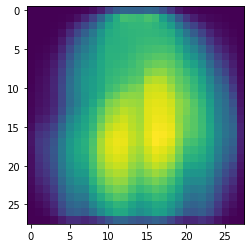

In [ ]:
# Create a heatmap over all active pixels from all frames
heatmap = np.mean(x_train, axis=0)
plt.imshow(heatmap)
wandb.log({"Heatmap of training images": wandb.Image(np.expand_dims(heatmap, axis=2), caption="The mean of all images in the training set")})

# Log a histogram of the average value for each pixel through out the
# training dataset. This shows us how many of the pixels that are
# always zero in all frames.
bin_names, heatmap_hist = create_histogram(heatmap.flatten(), bins=[0, 1, 10, 30, 100, 255])
log_bar(bin_names, heatmap_hist, "Average value per pixel in training data", x_name="bin", y_name="# pixels", keep_order=True)

In [ ]:
# Preprocess the data
# Normalize the values to the range -1...1
x_train_norm = x_train / 128 - 1
x_test_norm = x_test / 128 - 1

In [ ]:
# Create a new histogram of the modified values
min_value = min(x_train_norm.min(), x_test_norm.min())
max_value = max(x_train_norm.max(), x_test_norm.max())
wandb_run.summary["preprocessed"] = {"min": min_value, "max": max_value, "dtype": str(x_train_norm.dtype)}

bin_names, train_hist = create_histogram(x_train_norm)
log_bar(bin_names, train_hist, "Preprocessed training data", x_name="bin", y_name="# pixels", keep_order=True)

Sample 0 is number 9


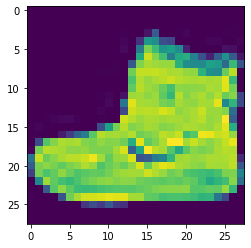

In [ ]:
i = 0
print(f"Sample {i} is number {y_train[i]}")
plt.imshow(x_train_norm[0])

image = wandb.Image(x_train_norm[0], caption=f"Training sample {i} is a {y_train[i]}")
wandb.log({"Example training image (preprocessed)": image})

In [ ]:
# Sample test data
num_images_per_label = Counter(y_test)
min_number_of_labels = min(num_images_per_label.values())

indexes_to_keep = []
for label in num_images_per_label.keys():
  indexes_to_keep.extend(
      np.random.choice(
          np.where(y_test == label)[0],
          size=min_number_of_labels,
          replace=False
      ).tolist()
  )

np.random.shuffle(indexes_to_keep)
x_test_norm_subsamp = x_test_norm[indexes_to_keep]
y_test_subsamp = y_test[indexes_to_keep]

In [ ]:
x_test_norm_subsamp.shape

(10000, 28, 28)

This should be a 9


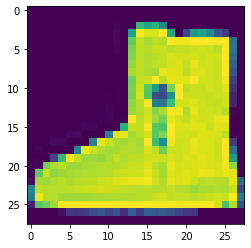

In [ ]:
# Verify that the labels and images are still in sync
print(f"This should be a {y_test_subsamp[0]}")
plt.imshow(x_test_norm_subsamp[0])

In [ ]:
# Log the new distribution
num_images_per_label = Counter(y_test_subsamp)
labels_, num_images = zip(*((str(label), number) for label, number in sorted(num_images_per_label.items())))
log_bar(labels_, num_images, "Labels in test data (subsampled)", x_name="Label", y_name="# images")